## Balkendiagramme

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 5](https://data-science.training/kapitel-5/)
* Datum: 23.03.2023

Zu neuen Features der Datenversion 5 [Seaborn]

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# Pyplot Modul der Matplot Bibliothek (Library) importieren
#  Mathematische grafische Daten-Visualisierungen
#  https://matplotlib.org/contents.html
import matplotlib.pyplot as plt
# Seaborn importieren [sns = seaborn name space, Samuel Norman Seaborn]
#  High-end Daten-Visualisierungen auf Basis von Matplot
#  https://seaborn.pydata.org/
import seaborn as sns
# Deutsches Zahlenformat
import locale
locale.setlocale(locale.LC_ALL, 'de')
# Warnungen unterdrücken
#import warnings
#warnings.filterwarnings('ignore')

'de'

In [5]:
# Trainingsdaten als Pandas Data Frame (df) aus Excel-Datei laden
#  (KNIME: "Excel Reader")
df_train = pd.read_excel('../../data/titanic/new/training_v5.xlsx')

In [6]:
# Datentypen automatisch konvertieren
df_train = df_train.convert_dtypes()

In [7]:
# Seaborn: Allgemeine Einstellungen

# Schriftart setzen
sns.set(font = 'Arial')
# Schriftgröße setzen
sns.set(font_scale = 2.5)
# Achsen im deutschen Zahlenformat
plt.rcParams['axes.formatter.use_locale'] = True
# Bildgröße setzen (16 x 9)
sns.set(rc={'figure.figsize':(8, 4.5)})
# Weißes Gitter setzen
sns.set_style('whitegrid')

In [8]:
display(df_train)

,Survived,KnownCabin,Child,FamilySize,LogFare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,0,0,2,2.110213,0,0,1,0,0,1,0,0,1,0,0
1,1,1,0,2,3.601186,1,0,0,1,0,0,0,0,0,1,0
2,1,0,0,1,2.188856,0,0,1,0,0,1,0,1,0,0,0
3,1,1,0,2,3.316003,1,0,0,0,0,1,0,0,0,1,0
4,0,0,0,1,2.202765,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,1,2.639057,0,1,0,0,0,1,0,0,0,0,1
887,1,1,0,1,3.433987,1,0,0,0,0,1,0,1,0,0,0
888,0,0,0,4,1.926072,0,0,1,0,0,1,0,1,0,0,0
889,1,1,0,1,3.433987,1,0,0,1,0,0,0,0,1,0,0


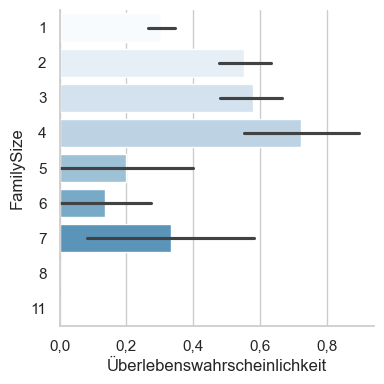

In [9]:
# (1a) Barplot zu FamilySize: Überlebenswahrscheinlichkeit
sns.catplot(data=df_train, x='Survived', y='FamilySize', kind='bar', palette='Blues', height=4, aspect=1, orient='h', hue='FamilySize', legend=False)

# Achsen beschriften
plt.xlabel('Überlebenswahrscheinlichkeit')
plt.ylabel('FamilySize')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_FamilySize_1.svg', format='svg', dpi=1200, transparent=True)

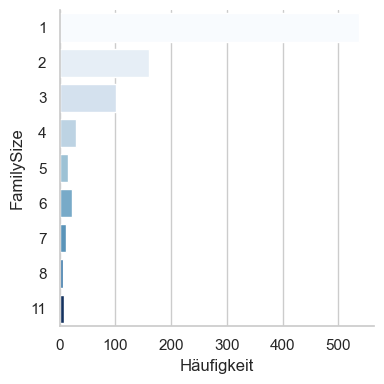

In [10]:
# (1b) Barplot zu FamilySize: Absolute Häufigkeiten
sns.catplot(data=df_train, y='FamilySize', kind='count', palette='Blues', height=4, aspect=1, hue='FamilySize', legend=False)

# Achsen beschriften
plt.xlabel('Häufigkeit')
plt.ylabel('FamilySize')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_FamilySize_2.svg', format='svg', dpi=1200, transparent=True)

In [11]:
# (1c) Tabelle zu FamilySize: Überlebenswahrscheinlichkeit
probs = df_train.groupby(['FamilySize'], as_index=False, observed=False)['Survived'].mean()
display(probs)

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.2
5,6,0.136364
6,7,0.333333
7,8,0.0
8,11,0.0


In [12]:
# (2) Binning zu LogFareBinned
bins = [0, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.6, 5.0]
df_train['LogFareBinned'] = pd.cut(df_train['LogFare'], bins=bins)

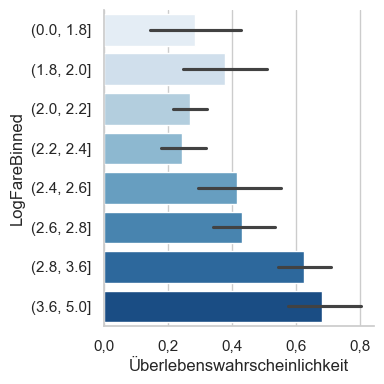

In [13]:
# (2a) Barplot zu LogFareBinned: Überlebenswahrscheinlichkeit
sns.catplot(data=df_train, x='Survived', y='LogFareBinned', kind='bar', palette='Blues', height=4, aspect=1, orient='h', hue='LogFareBinned', legend=False)

# Achsen beschriften
plt.xlabel('Überlebenswahrscheinlichkeit')
plt.ylabel('LogFareBinned')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_LogFareBinned_1.svg', format='svg', dpi=1200, transparent=True)

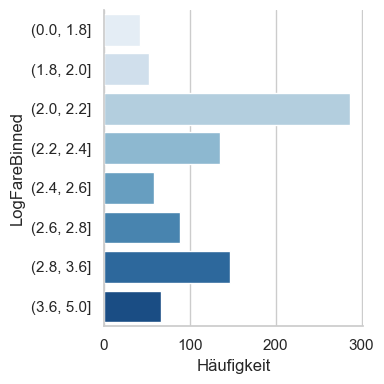

In [14]:
# (2b) Barplot zu LogFareBinned: Absolute Häufigkeiten
sns.catplot(data=df_train, y='LogFareBinned', kind='count', palette='Blues', height=4, aspect=1, hue='LogFareBinned', legend=False)

# Achsen beschriften
plt.xlabel('Häufigkeit')
plt.ylabel('LogFareBinned')

# Grafik speichern
plt.savefig('../../figures/svg/Bar_LogFareBinned_2.svg', format='svg', dpi=1200, transparent=True)

In [15]:
# (2c) Tabelle zu LogFareBinned: Überlebenswahrscheinlichkeit
probs = df_train.groupby(['LogFareBinned'], as_index=False, observed=False)['Survived'].mean()
display(probs)

,LogFareBinned,Survived
0,"(0.0, 1.8]",0.285714
1,"(1.8, 2.0]",0.377358
2,"(2.0, 2.2]",0.268293
3,"(2.2, 2.4]",0.244444
4,"(2.4, 2.6]",0.413793
5,"(2.6, 2.8]",0.431818
6,"(2.8, 3.6]",0.62585
7,"(3.6, 5.0]",0.681818
